# 🚦 Traffic Accidents and Air Pollution Analysis

This project explores the relationship between traffic accident counts and urban air pollution levels across major US cities.

The goal is to determine if higher traffic congestion correlates with worse air quality.

---
**Workflow:**
1. Load datasets.
2. Clean and preprocess the data.
3. Merge traffic and pollution data.
4. Perform exploratory data analysis (EDA).
5. Analyze correlations between accidents and pollution.
6. Draw conclusions.
---


In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Load Datasets

In [2]:
traffic_data = pd.read_csv("C:/Users/me/Downloads/US_Accidents_March23.csv/US_Accidents_March23.csv")
#traffic_data.head()

pollution_data = pd.read_csv("C:/Users/me/Downloads/pollution_2000_2023.csv/pollution_2000_2023.csv")
#pollution_data.head()

# Clean and Preprocess the Data

- Selected important columns.
- Handled missing values.

In [3]:
traffic_data.columns.values

array(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'], dtype=object)

In [4]:
# Keep only the important columns
traffic_clean = traffic_data[['ID', 'Start_Time', 'City', 'State', 'Severity']]

In [5]:

traffic_clean.head()

,ID,Start_Time,City,State,Severity
0,A-1,2016-02-08 05:46:00,Dayton,OH,3
1,A-2,2016-02-08 06:07:59,Reynoldsburg,OH,2
2,A-3,2016-02-08 06:49:27,Williamsburg,OH,2
3,A-4,2016-02-08 07:23:34,Dayton,OH,3
4,A-5,2016-02-08 07:39:07,Dayton,OH,2


In [6]:
# Save clean traffic data
traffic_clean.to_csv('clean_traffic_data.csv', index=False)


# Merge Traffic and Pollution Data

- Merged on City and Date.
- Removed unnecessary columns.

In [7]:
# Create a Date column from Start_Time
traffic_clean['Date'] = pd.to_datetime(traffic_clean['Start_Time']).dt.date

# Group traffic data by City and Date (count accidents, average severity)
traffic_daily = traffic_clean.groupby(['City', 'Date']).agg({
    'ID': 'count',         # Count number of accidents
    'Severity': 'mean'     # Average severity
}).reset_index()

traffic_daily.rename(columns={'ID': 'Accident_Count', 'Severity': 'Avg_Severity'}, inplace=True)

# Prepare pollution dataset (make sure Date is datetime)
pollution_data['Date'] = pd.to_datetime(pollution_data['Date']).dt.date

# Now merge traffic and pollution data
merged_data = pd.merge(traffic_daily, pollution_data, on=['City', 'Date'], how='inner')

# Preview merged dataset
print(merged_data.head())

# Save merged data
merged_data.to_csv('merged_traffic_pollution.csv', index=False)

print("✅ Merged dataset saved successfully!")

C:\Users\me\AppData\Local\Temp/ipykernel_18196/2136771237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_clean['Date'] = pd.to_datetime(traffic_clean['Start_Time']).dt.date


          City        Date  Accident_Count  Avg_Severity  Unnamed: 0  \
0  Albuquerque  2016-06-28               1           3.0      455743   
1  Albuquerque  2016-06-29               2           2.0      455744   
2  Albuquerque  2016-06-30               1           2.0      455745   
3  Albuquerque  2016-07-01               1           2.0      455746   
4  Albuquerque  2016-07-05               2           2.0      455750   

              Address       State      County   O3 Mean  O3 1st Max Value  \
0  4700A SAN MATEO NE  New Mexico  Bernalillo  0.037000             0.044   
1  4700A SAN MATEO NE  New Mexico  Bernalillo  0.042941             0.048   
2  4700A SAN MATEO NE  New Mexico  Bernalillo  0.041000             0.050   
3  4700A SAN MATEO NE  New Mexico  Bernalillo  0.034059             0.040   
4  4700A SAN MATEO NE  New Mexico  Bernalillo  0.039588             0.050   

   ...  CO 1st Max Hour  CO AQI  SO2 Mean  SO2 1st Max Value  \
0  ...               10     2.0  1.00833

In [8]:
merged_data.columns.values

array(['City', 'Date', 'Accident_Count', 'Avg_Severity', 'Unnamed: 0',
       'Address', 'State', 'County', 'O3 Mean', 'O3 1st Max Value',
       'O3 1st Max Hour', 'O3 AQI', 'CO Mean', 'CO 1st Max Value',
       'CO 1st Max Hour', 'CO AQI', 'SO2 Mean', 'SO2 1st Max Value',
       'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI'], dtype=object)

In [9]:
# Define the final clean columns
columns_to_keep = [
    'City', 'Date', 'Accident_Count', 'Avg_Severity',
    'State',
    'O3 Mean', 'O3 AQI',
    'CO Mean', 'CO AQI',
    'SO2 Mean', 'SO2 AQI',
    'NO2 Mean', 'NO2 AQI'
]

# Create a new clean dataset
merged_clean = merged_data[columns_to_keep]

# Save it
merged_clean.to_csv('merged_traffic_pollution_clean.csv', index=False)

In [10]:
merged_clean.head()
merged_clean.info()
merged_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103625 entries, 0 to 103624
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   City            103625 non-null  object 
 1   Date            103625 non-null  object 
 2   Accident_Count  103625 non-null  int64  
 3   Avg_Severity    103625 non-null  float64
 4   State           103625 non-null  object 
 5   O3 Mean         103625 non-null  float64
 6   O3 AQI          103625 non-null  int64  
 7   CO Mean         103625 non-null  float64
 8   CO AQI          103625 non-null  float64
 9   SO2 Mean        103625 non-null  float64
 10  SO2 AQI         103625 non-null  float64
 11  NO2 Mean        103625 non-null  float64
 12  NO2 AQI         103625 non-null  int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 11.1+ MB


,Accident_Count,Avg_Severity,O3 Mean,O3 AQI,CO Mean,CO AQI,SO2 Mean,SO2 AQI,NO2 Mean,NO2 AQI
count,103625.000000,103625.000000,103625.000000,103625.000000,103625.000000,103625.000000,103625.000000,103625.000000,103625.000000,103625.000000
mean,17.993621,2.301037,0.028119,37.275252,0.272503,4.289197,0.466168,1.074885,10.927803,20.753612
std,26.670957,0.379368,0.011332,18.540385,0.172419,3.150631,0.553369,2.751239,7.585037,11.988722
min,1.000000,1.000000,-0.000706,0.000000,-0.400000,0.000000,-2.508333,0.000000,-1.942857,0.000000
25%,2.000000,2.000000,0.019882,27.000000,0.175000,2.000000,0.108696,0.000000,5.362500,11.000000
50%,7.000000,2.166667,0.027882,34.000000,0.229167,3.000000,0.328571,0.000000,8.956522,19.000000
75%,21.000000,2.500000,0.035882,43.000000,0.333333,6.000000,0.659091,1.000000,14.534783,29.000000
max,275.000000,4.000000,0.083200,214.000000,2.366667,38.000000,23.117391,118.000000,140.650000,133.000000


# Exploratory Data Analysis (EDA)

- Visualized accident trends and pollution trends.
- Analyzed scatter plots between accidents and pollutant AQI levels.

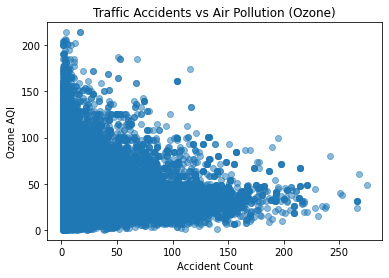

In [11]:
import matplotlib.pyplot as plt

plt.scatter(merged_clean['Accident_Count'], merged_clean['O3 AQI'], alpha=0.5)
plt.xlabel('Accident Count')
plt.ylabel('Ozone AQI')
plt.title('Traffic Accidents vs Air Pollution (Ozone)')
plt.show()

# Correlation Analysis by City

- Calculated correlation between Accident Count and pollutant levels city by city.
- Identified cities with the strongest relationships (e.g., Houston, Tulsa).

In [12]:
# Make sure Date is in datetime format
merged_clean['Date'] = pd.to_datetime(merged_clean['Date'])

# Group by city
cities = merged_clean['City'].unique()

# Empty list to store results
city_correlations = []

# Loop over each city
for city in cities:
    city_data = merged_clean[merged_clean['City'] == city]
    
    # Check if enough data points
    if len(city_data) > 100:  # Skip tiny cities
        corr = city_data[['Accident_Count', 'O3 AQI', 'NO2 AQI', 'CO AQI', 'SO2 AQI']].corr()
        accident_corr = corr['Accident_Count'][1:]  # Correlation with pollution columns
        city_correlations.append((city, accident_corr.mean()))  # Average correlation for that city

# Sort cities by strongest relationship
city_correlations = sorted(city_correlations, key=lambda x: abs(x[1]), reverse=True)

# Show top 10 cities
for city, correlation in city_correlations[:10]:
    print(f"City: {city}, Average Correlation with Pollution: {correlation:.3f}")

C:\Users\me\AppData\Local\Temp/ipykernel_18196/481083626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean['Date'] = pd.to_datetime(merged_clean['Date'])


City: Memphis, Average Correlation with Pollution: -0.111
City: Grand Rapids, Average Correlation with Pollution: -0.090
City: North Little Rock, Average Correlation with Pollution: -0.086
City: Tulsa, Average Correlation with Pollution: 0.081
City: Cleveland, Average Correlation with Pollution: -0.079
City: Houston, Average Correlation with Pollution: 0.072
City: Cincinnati, Average Correlation with Pollution: -0.067
City: Portland, Average Correlation with Pollution: -0.061
City: El Cajon, Average Correlation with Pollution: -0.061
City: Londonderry, Average Correlation with Pollution: -0.059


# Visualizing Best Cities

Scatter plots for Houston and Tulsa, where traffic and pollution show slight positive correlations.


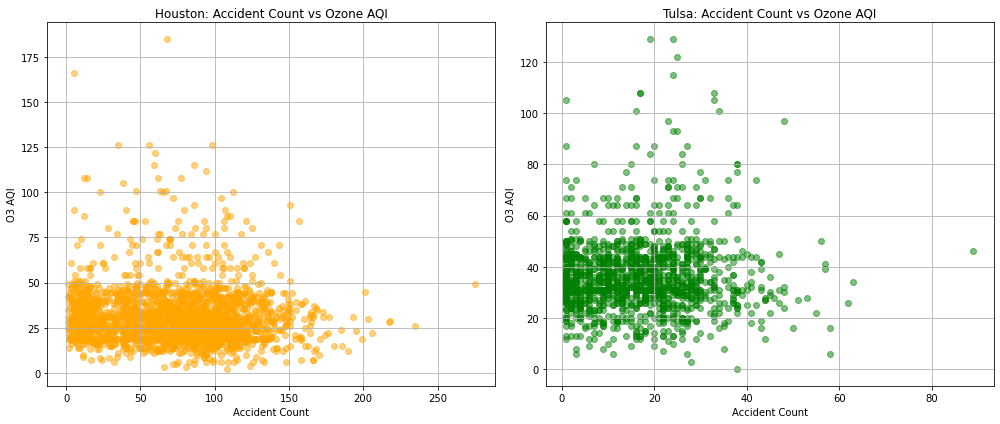

In [13]:

# Filter data for Houston
houston_data = merged_clean[merged_clean['City'] == 'Houston']

# Filter data for Tulsa
tulsa_data = merged_clean[merged_clean['City'] == 'Tulsa']

# Create side-by-side scatter plots
plt.figure(figsize=(14, 6))

# Houston plot
plt.subplot(1, 2, 1)
plt.scatter(houston_data['Accident_Count'], houston_data['O3 AQI'], alpha=0.5, color='orange')
plt.title('Houston: Accident Count vs Ozone AQI')
plt.xlabel('Accident Count')
plt.ylabel('O3 AQI')
plt.grid(True)

# Tulsa plot
plt.subplot(1, 2, 2)
plt.scatter(tulsa_data['Accident_Count'], tulsa_data['O3 AQI'], alpha=0.5, color='green')
plt.title('Tulsa: Accident Count vs Ozone AQI')
plt.xlabel('Accident Count')
plt.ylabel('O3 AQI')
plt.grid(True)

plt.tight_layout()
plt.show()


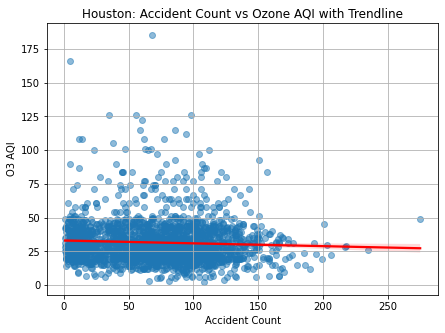

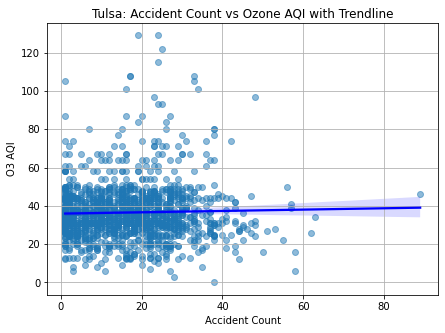

In [14]:
import seaborn as sns

# Houston with trendline
plt.figure(figsize=(7, 5))
sns.regplot(x='Accident_Count', y='O3 AQI', data=houston_data, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Houston: Accident Count vs Ozone AQI with Trendline')
plt.xlabel('Accident Count')
plt.ylabel('O3 AQI')
plt.grid(True)
plt.show()

# Tulsa with trendline
plt.figure(figsize=(7, 5))
sns.regplot(x='Accident_Count', y='O3 AQI', data=tulsa_data, scatter_kws={'alpha':0.5}, line_kws={"color":"blue"})
plt.title('Tulsa: Accident Count vs Ozone AQI with Trendline')
plt.xlabel('Accident Count')
plt.ylabel('O3 AQI')
plt.grid(True)
plt.show()


# Conclusion

- Most cities show weak or no correlation between traffic accidents and pollution levels.
- Houston and Tulsa showed slight positive correlation.
- Real-world urban air pollution is influenced by many factors like industry and weather.
- Further work could include weather data and seasonal patterns.

---
✅ This project demonstrates full real-world data handling: cleaning, merging, analysis, and storytelling.
